# Create Norway elevation map of MEPS area using Etopo1 and matplotlib
http://www.trondkristiansen.com/?page_id=846


https://www.ngdc.noaa.gov/mgg/global/global.html

In [10]:
import os, sys, datetime, string
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/')
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/Norway_map/')
sys.path.append('/uio/kant/geo-metos-u7/franzihe/Documents/Thesis/Python/MEPS/')
import matplotlib.pyplot as plt

#import createMapsEtopo1 as maps
import save_fig as sF
import createFolder as cF
from netCDF4 import Dataset
import numpy as np
import laplaceFilter
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.colors as colors

import fct_maps as fcm
from calc_station_properties import find_station_yx

In [11]:
station = 'Haukeliseter'
savefig = 0   # 1 = yes, 0 = no
fig_dir = '../../Figures/Norway_map/%s/' %station
cF.createFolder(fig_dir)
form = 'png'

In [12]:
stn_lat = 59.81
stn_lon = 7.21

In [13]:
thredds      = 'http://thredds.met.no/thredds/dodsC/meps25epsarchive'
year = '2016'
month = '12'
day = '24'
met_files = ['meps_mbr0_pp_2_5km_',
             'meps_subset_2_5km_',
             'meps_mbr0_full_backup_2_5km_'
            ]
forecasttime = '00'

In [14]:
# Open the NetCDF file
Dataframe = Dataset('%s/%s/%s/%s/%s%s%s%sT%sZ.nc' %(thredds,year,month,day,met_files[0],year,month,day,forecasttime),
                                 'r')

In [15]:
alti= Dataframe.variables['altitude'][:]

In [16]:
## Latitudes
## [y = 949][x = 739]
latitude = Dataframe.variables['latitude'][:]

## Longitudes 
## [y = 949][x = 739]
longitude = Dataframe.variables['longitude'][:]

Dataframe.close()

In [17]:
x, y = find_station_yx(latitude, longitude, stn_lat, stn_lon)

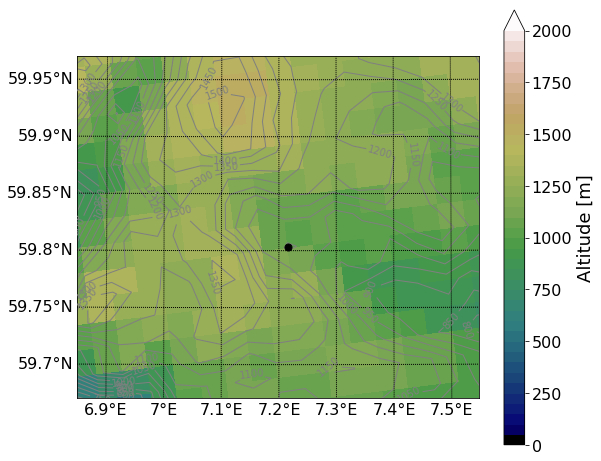

In [18]:
### Norway ###
#plt.figure(1)
fig = plt.figure(figsize=(9,8))
plt.clf()

map = fcm.Lambert_map(lllon=6.85, lllat=59.67, 
                  urlon=7.55, urlat=59.97, 
                  lat0= stn_lat, lon0= stn_lon, res='l', fill=True,zoom=True)

Lonpp,Latpp = map(longitude,latitude)

levels = np.arange(0,2100,50)

fcm.PlotContours(Lonpp, Latpp, alti, map, leveldist=None, levels=levels[:], numbers=True,color='gray')

norm = colors.BoundaryNorm(boundaries = levels, ncolors=plt.cm.gist_earth.N)


cs = map.pcolormesh(Lonpp, Latpp, alti,  cmap=plt.cm.gist_earth, norm=norm)
cb = plt.colorbar(cs, boundaries= levels,extend='max')
cb.set_label('Altitude [m]', size=18)    
cb.ax.tick_params(labelsize=16)
plt.gca().set_aspect('equal', adjustable='box')

cb.ax.set_xticklabels(np.arange(700,2100,50)[::4])



xpt, ypt = map(longitude[y[0], x[0]], latitude[y[0], x[0]])
map.plot(xpt, ypt, 'ko', markersize = 7)
    
if savefig == 1:
    cF.createFolder('%s/' %(fig_dir))
    fig_name = 'elevation_Haukeli_MEPS.'+form
    plt.savefig('%s/%s' %(fig_dir, fig_name), format = form, bbox_inches ='tight')
    print('plot saved: %s/%s' %(fig_dir, fig_name))
else:
    plt.show()